#Kaggle connection

In [2]:
!pip install kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fincher17","key":"66ed96c2db9ae3c74ae3bff7bd919804"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

 # Exercise 1 : Visualizing The Distribution Of CGPA

Create a histogram to visualize the distribution of students’ CGPA.

**Dataset Overview:** The CGPA of students is categorized into different ranges. This exercise will help us understand the overall academic performance distribution among the students.

**Tasks:**
- Import necessary libraries.
- Load the dataset into a pandas DataFrame. (For the purpose of this exercise, let’s assume the DataFrame is already loaded and named df).
- Use Seaborn’s histplot to create a histogram of the CGPA categories.
- Customize the histogram with an appropriate color and add a title.
- Display the plot.

In [7]:
!kaggle datasets download -d shariful07/student-mental-health

Dataset URL: https://www.kaggle.com/datasets/shariful07/student-mental-health
License(s): CC0-1.0
  0% 0.00/1.62k [00:00<?, ?B/s]
100% 1.62k/1.62k [00:00<00:00, 3.55MB/s]


In [8]:
!unzip student-mental-health.zip

Archive:  student-mental-health.zip
  inflating: Student Mental health.csv  


In [92]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Student Mental health.csv')
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [93]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [94]:
df.dropna(axis=0, inplace=True)

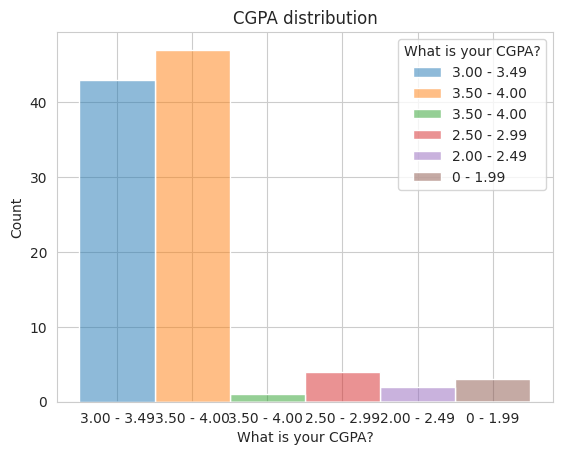

In [95]:
sns.histplot(data = df, x='What is your CGPA?', hue='What is your CGPA?').set(title='CGPA distribution')
sns.set_style('whitegrid')

# Exercise 2: Comparing Anxiety Levels Across Different Genders

Use a bar plot to compare the proportion of students experiencing anxiety across different genders.

**Dataset Overview:** The dataset includes a ‘Do you have Anxiety?’ column with responses and a ‘Choose your gender’ column.

**Tasks:**

- Import necessary libraries.
- Assuming the dataset is loaded into df, create a bar plot using Seaborn to compare anxiety levels across genders.
- Customize your plot with an appropriate color palette.
- Add a title to your plot.
- Display the plot.

[Text(0.5, 1.0, 'Anxiety level')]

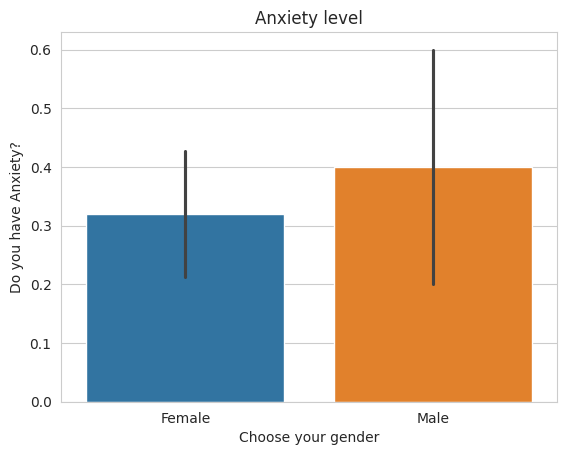

In [96]:
sns.barplot(data=df, x='Choose your gender', y=df['Do you have Anxiety?'] =='Yes',  hue='Choose your gender').set(title='Anxiety level')

# Exercise 3: Exploring The Relationship Between Age And Panic Attacks

Create a scatter plot to explore if there’s any visible relationship between students’ age and the occurrence of panic attacks.

**Dataset Overview**: The dataset records students’ ages and their responses to whether they have experienced panic attacks.

**Tasks:**

- Import necessary libraries.
- Use Seaborn’s scatterplot to create a scatter plot with age on the x-axis and the occurrence of panic attacks on the y-axis. For simplicity, convert panic attack responses to numeric (e.g., Yes=1, No=0).
- Customize the scatter plot to improve readability.
- Add a title.
- Display the plot.

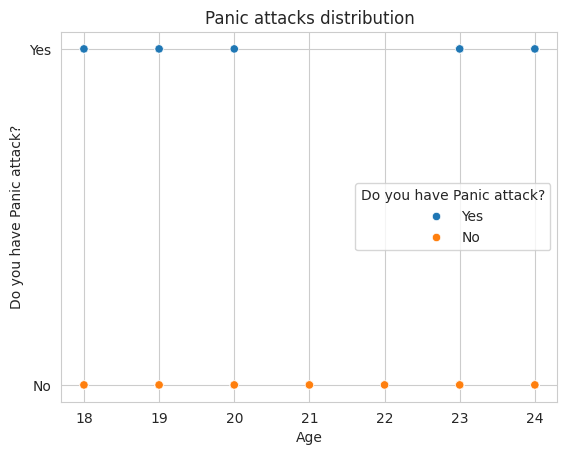

In [97]:
sns.scatterplot(data=df, x='Age', y='Do you have Panic attack?', hue ='Do you have Panic attack?').set(title='Panic attacks distribution')
sns.set_style('whitegrid')

# Exercise 4: Visualizing Pairwise Relationships With Seaborn Pair Plot

Utilize Seaborn’s pairplot function to visualize the pairwise relationships and distributions across multiple variables in the dataset.

Scenario: You’re interested in understanding the relationships between students’ ages, CGPAs, and their mental health status regarding depression, anxiety, and panic attacks.

Tasks:

- Select a subset of columns relevant to the exercise: Age, CGPA, Depression, - - Anxiety, and Panic attacks. Assume these columns are appropriately coded as numerical values for simplicity.
- Use Seaborn’s pairplot to visualize pairwise relationships and distributions.
- Customize the plot with a hue based on one of the mental health conditions to differentiate the data points.

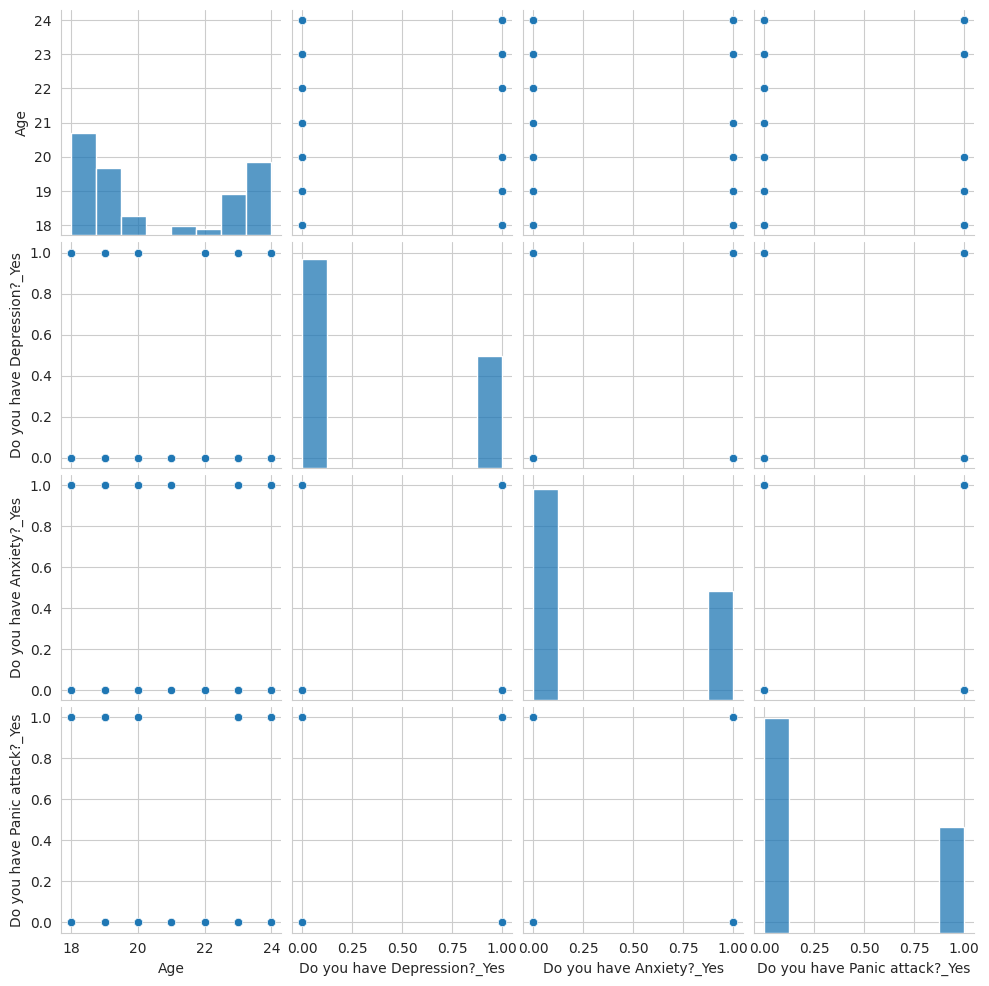

In [101]:
df = pd.get_dummies(df, columns=['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?'], dtype='int8')
subset = df[['What is your CGPA?', 'Age', 'Do you have Depression?_Yes', 'Do you have Anxiety?_Yes', 'Do you have Panic attack?_Yes']]
sns.pairplot(subset)

# Exercise 5: Creating A Heatmap To Visualize Correlations

Use Seaborn to create a heatmap that visualizes the correlation matrix of students’ age, CGPA, and mental health status indicators.

**Scenario:** You aim to identify any potential correlations between students’ age, CGPA, and their self-reported status on depression, anxiety, and panic attacks to find patterns that might need further investigation.

**Tasks:**

- Calculate the correlation matrix for the selected subset of your dataset.
- Use Seaborn’s heatmap function to visualize the correlation matrix.
- Customize the heatmap for better readability (e.g., annotating the correlation coefficients).

In [102]:
# sns.heatmap(subset)

ValueError: could not convert string to float: '3.00 - 3.49'

# Exercise 6: Analyzing Distributions And Relationships Using FacetGrid

Explore the distribution of CGPA across different levels of depression status using Seaborn’s FacetGrid.

**Scenario:** You are interested in exploring how students’ CGPA distributions vary among those who have reported depression versus those who haven’t.

**Tasks:**

- Use Seaborn’s FacetGrid to create a grid of histograms for CGPA, segmented by depression status.
- Map a histogram plot to each facet with appropriate customizations.
- Add titles and labels for clarity.

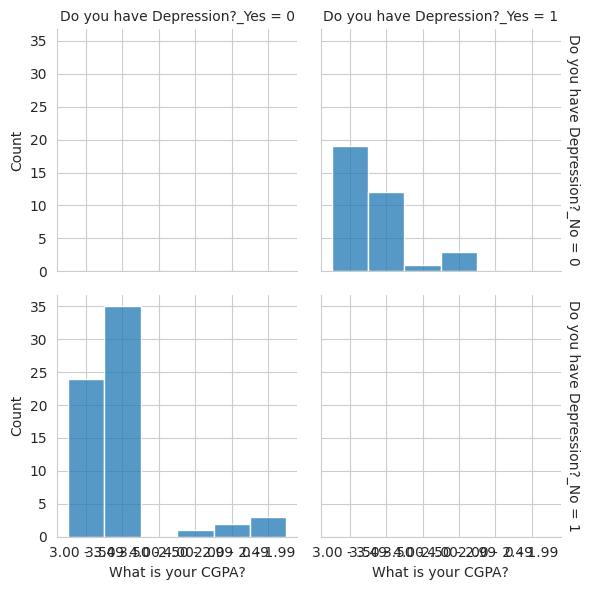

In [109]:
sns.displot(df, x='What is your CGPA?', col='Do you have Depression?_Yes', row='Do you have Depression?_No', binwidth=5, height=3, facet_kws=dict(margin_titles=True))